In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import seaborn as sns

In [221]:
!pip install mrmr-selection

In [222]:
from mrmr import mrmr_classif, mrmr_regression
from sklearn.ensemble import RandomForestClassifier

## GlobalLandTemperatures_GlobalTemperatures_Week6

Download the csv file

In [223]:
bronze_data= pd.read_csv('GlobalLandTemperatures_GlobalTemperatures.csv')

In [224]:
bronze_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [225]:
bronze_data.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [226]:
bronze_data.tail()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


## Features Engineering

## Preprocessing and EDA of the data

In [227]:
# change the name for the raw data from bronze to silver to start making changes on the dataframe
silver_df= bronze_data

In [228]:
#change the names of the columns
silver_df.rename(columns={'LandAverageTemperature': 'LandAvgTemp', 'LandAverageTemperatureUncertainty':'LandAvgTempUncert',
                            'LandMaxTemperature':'LandMaxTemp', 'LandMaxTemperatureUncertainty':'LandMaxTempUncert',
                            'LandMinTemperature':'LandMinTemp', 'LandMinTemperatureUncertainty': 'LandMinTempUncert',
                            'LandAndOceanAverageTemperature': 'Land_OceanAvgTemp', 'LandAndOceanAverageTemperatureUncertainty':'Land_OceanAvgTempUncert'}, inplace= True)

In [229]:
# convert "dt" column to datetime data type
silver_df['dt']= pd.to_datetime(silver_df['dt'])

## Adding Date-Related Features

In [230]:
silver_df['month']= silver_df['dt'].dt.month

In [231]:
silver_df['year']= silver_df['dt'].dt.year

set the datetime as index

In [232]:
silver_df.set_index('dt', inplace= True)

In [233]:
silver_df

,LandAvgTemp,LandAvgTempUncert,LandMaxTemp,LandMaxTempUncert,LandMinTemp,LandMinTempUncert,Land_OceanAvgTemp,Land_OceanAvgTempUncert,month,year
dt,,,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1,1750
1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,2,1750
1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,3,1750
1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,4,1750
1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,5,1750
...,...,...,...,...,...,...,...,...,...,...
2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057,8,2015
2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058,9,2015
2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062,10,2015


find the null values and clean the data

In [234]:
silver_df.isnull().sum()

LandAvgTemp                  12
LandAvgTempUncert            12
LandMaxTemp                1200
LandMaxTempUncert          1200
LandMinTemp                1200
LandMinTempUncert          1200
Land_OceanAvgTemp          1200
Land_OceanAvgTempUncert    1200
month                         0
year                          0
dtype: int64

In [235]:
# for the LandAvgTemp column and LandAvgTempUncert column the null values are few and can be replaced by inerpolation
silver_df['LandAvgTemp'].fillna(silver_df['LandAvgTemp'].interpolate(), inplace= True)
silver_df['LandAvgTempUncert'].fillna(silver_df['LandAvgTempUncert'].interpolate(), inplace= True)

In [236]:
#the rest null values are so many and the best way is to drop them all
silver_df.isnull().sum()

LandAvgTemp                   0
LandAvgTempUncert             0
LandMaxTemp                1200
LandMaxTempUncert          1200
LandMinTemp                1200
LandMinTempUncert          1200
Land_OceanAvgTemp          1200
Land_OceanAvgTempUncert    1200
month                         0
year                          0
dtype: int64

In [237]:
silver_df.dropna(inplace=True)

In [238]:
silver_df.isnull().sum()

LandAvgTemp                0
LandAvgTempUncert          0
LandMaxTemp                0
LandMaxTempUncert          0
LandMinTemp                0
LandMinTempUncert          0
Land_OceanAvgTemp          0
Land_OceanAvgTempUncert    0
month                      0
year                       0
dtype: int64

## Seasonal Indicators

In [239]:
silver_df['season']= silver_df['month']%12 // 3 + 1

## Adding additional Lag Features and rolling window

In [240]:
silver_df.columns

Index(['LandAvgTemp', 'LandAvgTempUncert', 'LandMaxTemp', 'LandMaxTempUncert',
       'LandMinTemp', 'LandMinTempUncert', 'Land_OceanAvgTemp',
       'Land_OceanAvgTempUncert', 'month', 'year', 'season'],
      dtype='object')

In [241]:
rol= [6, 12]
shift= [36, 42, 48]

In [242]:
for r in rol:
  for s in shift:
    silver_df[f'LandAvgTemp_rolling{r}_shifting{s}']= silver_df['LandAvgTemp'].rolling(window = r, min_periods=1).mean().shift(s)
    silver_df[f'LandAvgTempUncert_rolling{r}_shifting{s}']= silver_df['LandAvgTempUncert'].rolling(window = r, min_periods=1).mean().shift(s)
    silver_df[f'LandMaxTemp_rolling{r}_shifting{s}']= silver_df['LandMaxTemp'].rolling(window = r, min_periods=1).mean().shift(s)
    silver_df[f'LandMaxTempUncert_rolling{r}_shifting{s}']= silver_df['LandMaxTempUncert'].rolling(window = r, min_periods=1).mean().shift(s)
    silver_df[f'LandMinTemp_rolling{r}_shifting{s}']= silver_df['LandMinTemp'].rolling(window = r, min_periods=1).mean().shift(s)
    silver_df[f'LandMinTempUncert_rolling{r}_shifting{s}']= silver_df['LandMinTempUncert'].rolling(window = r, min_periods=1).mean().shift(s)
    silver_df[f'Land_OceanAvgTemp_rolling{r}_shifting{s}']= silver_df['Land_OceanAvgTemp'].rolling(window = r, min_periods=1).mean().shift(s)
    silver_df[f'Land_OceanAvgTempUncert_rolling{r}_shifting{s}']= silver_df['Land_OceanAvgTempUncert'].rolling(window = r, min_periods=1).mean().shift(s)

In [243]:
silver_df.drop(columns=['LandAvgTempUncert', 'LandMaxTemp', 'LandMaxTempUncert', 'LandMinTemp', 'LandMinTempUncert', 'Land_OceanAvgTemp',
                        'Land_OceanAvgTempUncert'], inplace=True)

In [244]:
silver_df.isnull().sum()

LandAvgTemp                                      0
month                                            0
year                                             0
season                                           0
LandAvgTemp_rolling6_shifting36                 36
LandAvgTempUncert_rolling6_shifting36           36
LandMaxTemp_rolling6_shifting36                 36
LandMaxTempUncert_rolling6_shifting36           36
LandMinTemp_rolling6_shifting36                 36
LandMinTempUncert_rolling6_shifting36           36
Land_OceanAvgTemp_rolling6_shifting36           36
Land_OceanAvgTempUncert_rolling6_shifting36     36
LandAvgTemp_rolling6_shifting42                 42
LandAvgTempUncert_rolling6_shifting42           42
LandMaxTemp_rolling6_shifting42                 42
LandMaxTempUncert_rolling6_shifting42           42
LandMinTemp_rolling6_shifting42                 42
LandMinTempUncert_rolling6_shifting42           42
Land_OceanAvgTemp_rolling6_shifting42           42
Land_OceanAvgTempUncert_rolling

In [245]:
silver_df.dropna(inplace=True)

In [246]:
silver_df.isnull().sum()

LandAvgTemp                                     0
month                                           0
year                                            0
season                                          0
LandAvgTemp_rolling6_shifting36                 0
LandAvgTempUncert_rolling6_shifting36           0
LandMaxTemp_rolling6_shifting36                 0
LandMaxTempUncert_rolling6_shifting36           0
LandMinTemp_rolling6_shifting36                 0
LandMinTempUncert_rolling6_shifting36           0
Land_OceanAvgTemp_rolling6_shifting36           0
Land_OceanAvgTempUncert_rolling6_shifting36     0
LandAvgTemp_rolling6_shifting42                 0
LandAvgTempUncert_rolling6_shifting42           0
LandMaxTemp_rolling6_shifting42                 0
LandMaxTempUncert_rolling6_shifting42           0
LandMinTemp_rolling6_shifting42                 0
LandMinTempUncert_rolling6_shifting42           0
Land_OceanAvgTemp_rolling6_shifting42           0
Land_OceanAvgTempUncert_rolling6_shifting42     0


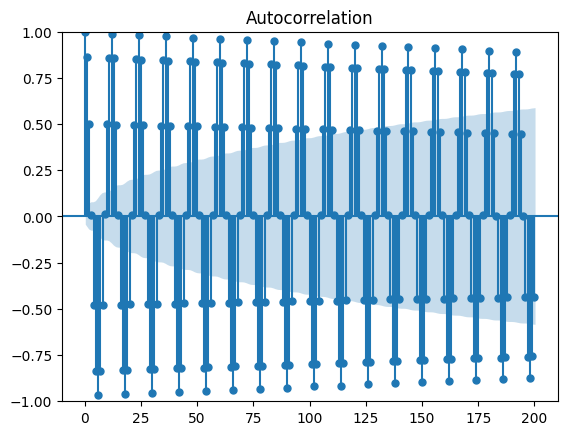

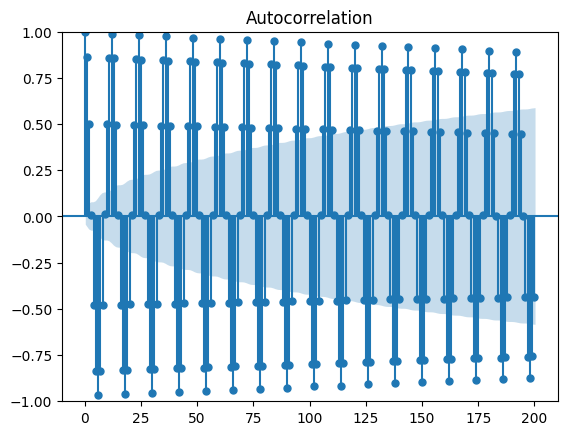

In [247]:
plot_acf(silver_df['LandAvgTemp'], lags=200)

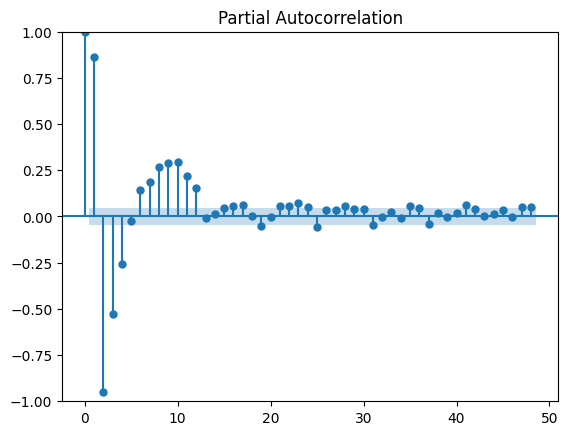

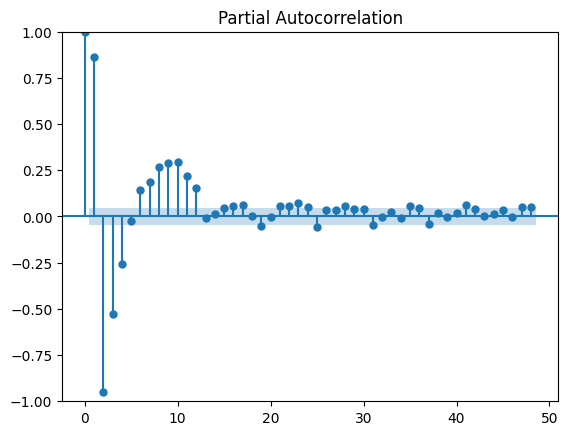

In [248]:
plot_pacf(silver_df['LandAvgTemp'], lags=48)

In [249]:
silver_df.head()

,LandAvgTemp,month,year,season,LandAvgTemp_rolling6_shifting36,LandAvgTempUncert_rolling6_shifting36,LandMaxTemp_rolling6_shifting36,LandMaxTempUncert_rolling6_shifting36,LandMinTemp_rolling6_shifting36,LandMinTempUncert_rolling6_shifting36,...,Land_OceanAvgTemp_rolling12_shifting42,Land_OceanAvgTempUncert_rolling12_shifting42,LandAvgTemp_rolling12_shifting48,LandAvgTempUncert_rolling12_shifting48,LandMaxTemp_rolling12_shifting48,LandMaxTempUncert_rolling12_shifting48,LandMinTemp_rolling12_shifting48,LandMinTempUncert_rolling12_shifting48,Land_OceanAvgTemp_rolling12_shifting48,Land_OceanAvgTempUncert_rolling12_shifting48
dt,,,,,,,,,,,,,,,,,,,,,
1854-01-01,1.281,1,1854,1,7.267000,0.965667,12.557333,2.487333,1.430333,1.741833,...,14.824857,0.303000,0.749000,1.105000,8.242000,1.7380,-3.206000,2.822000,12.83300,0.36700
1854-02-01,1.941,2,1854,1,5.345167,1.015333,11.112500,2.583167,-0.055167,2.013167,...,15.061500,0.300125,1.910000,1.190000,9.106000,2.3725,-2.748500,2.222500,13.21050,0.39050
1854-03-01,4.698,3,1854,2,4.126333,1.064667,10.389333,2.474000,-0.927333,1.982000,...,15.153111,0.295000,2.924667,1.111667,9.519667,2.3820,-2.467333,1.951667,13.48800,0.37400
1854-04-01,7.622,4,1854,2,3.992333,1.059000,10.563833,2.412667,-0.874333,1.840000,...,15.120900,0.295200,3.997750,1.000000,10.373250,2.0375,-1.596000,1.796000,13.78275,0.34725
1854-05-01,11.095,5,1854,2,5.055667,1.023500,11.167500,2.361500,-0.165000,1.830333,...,15.009636,0.301818,5.199000,0.923400,11.429600,2.1112,-0.514600,1.706200,14.12760,0.32760


##Split the data into features (X) and target (y)

In [250]:
silver_df = silver_df.sort_values(['dt'])

In [251]:
clean_data = silver_df.copy()

In [252]:
X= clean_data.drop('LandAvgTemp', axis=1)
X.shape

(1944, 51)

In [253]:
y= clean_data['LandAvgTemp']
y.shape

(1944,)

## Feature selection

 Using MRMR

In [254]:
selected_features = mrmr_regression(X=X, y=y, K=12)

100%|██████████| 12/12 [00:00<00:00, 15.03it/s]


In [255]:
selected_features

['season',
 'year',
 'month',
 'Land_OceanAvgTemp_rolling6_shifting48',
 'Land_OceanAvgTemp_rolling6_shifting36',
 'LandMaxTemp_rolling6_shifting48',
 'LandMaxTemp_rolling6_shifting36',
 'LandAvgTemp_rolling6_shifting48',
 'LandAvgTemp_rolling6_shifting36',
 'LandMaxTemp_rolling6_shifting42',
 'Land_OceanAvgTemp_rolling6_shifting42',
 'LandMinTemp_rolling6_shifting48']

In [256]:
X_selected_features= X[selected_features]

## Stationary

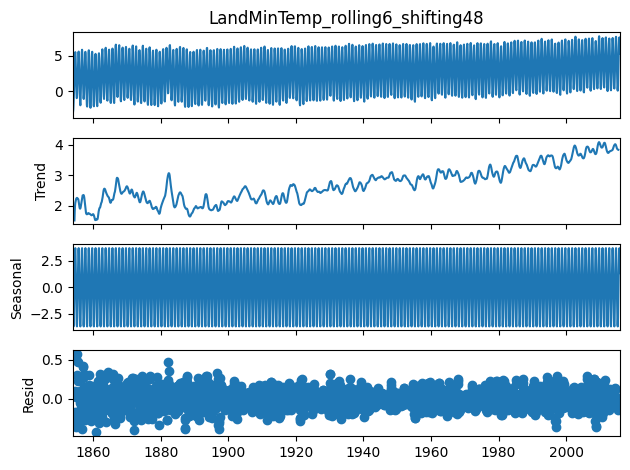

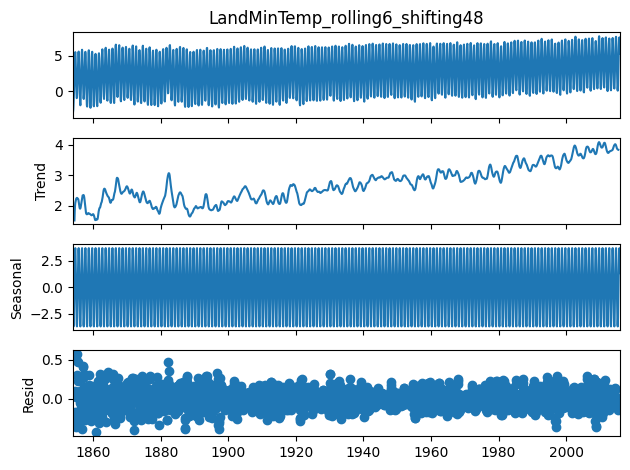

In [257]:
from statsmodels.tsa.seasonal import seasonal_decompose


for ts in X_selected_features.columns:
    results = seasonal_decompose(X_selected_features[ts])

results.plot()

In [258]:
from statsmodels.tsa.stattools import adfuller
for sf in X_selected_features.columns:
  adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(X_selected_features[sf].values)

  print('ADF test statistic:', adf)
  print('ADF p-values:', pval)
  print('ADF number of lags used:', usedlag)
  print('ADF number of observations:', nobs)
  print('ADF critical values:', crit_vals)
  print('ADF best information criterion:', icbest)

  if pval > 0.05:
    print(" the data is not stationary")
  else:
    print(" the data is stationary")
  print('\n')

ADF test statistic: -5781803339415797.0
ADF p-values: 0.0
ADF number of lags used: 9
ADF number of observations: 1934
ADF critical values: {'1%': -3.433735729398985, '5%': -2.8630356049379273, '10%': -2.5675662008429145}
ADF best information criterion: -118938.26006450313
 the data is stationary


ADF test statistic: -1.4154237512353958
ADF p-values: 0.5748598503490581
ADF number of lags used: 19
ADF number of observations: 1924
ADF critical values: {'1%': -3.43375335030681, '5%': -2.863043384324392, '10%': -2.5675703430245376}
ADF best information criterion: -113483.85008685419
 the data is not stationary


ADF test statistic: -1.1705155765182982e-11
ADF p-values: 0.958532086059088
ADF number of lags used: 11
ADF number of observations: 1932
ADF critical values: {'1%': -3.4337392389681867, '5%': -2.8630371543677153, '10%': -2.567567025845625}
ADF best information criterion: -110696.67863763851
 the data is not stationary


ADF test statistic: -1.7755302905843589
ADF p-values: 0.392676

Differencing

<Axes: xlabel='dt'>

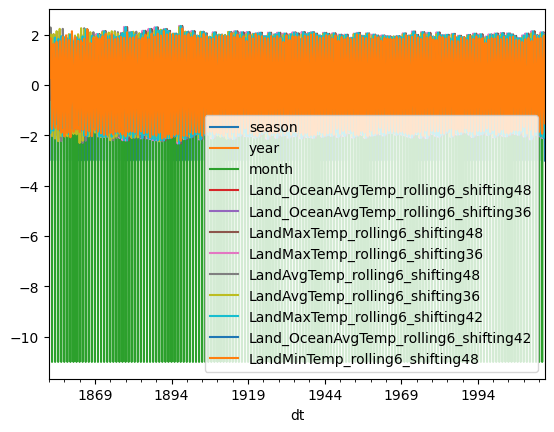

In [205]:
differenced_df= X_selected_features
for sf in X_selected_features.columns:
  differenced_df[sf] = X_selected_features[sf].diff()

differenced_df.plot()




In [259]:
differenced_df.dropna(inplace= True)

In [261]:
for sf in differenced_df.columns:
  adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(differenced_df[sf].dropna())
  print('ADF test statistic:', adf)
  print('ADF p-values:', pval)
  print('ADF number of lags used:', usedlag)
  print('ADF number of observations:', nobs)
  print('ADF critical values:', crit_vals)
  print('ADF best information criterion:', icbest)

  if pval > 0.05:
    print(" the data is not stationary")
  else:
    print(" the data is stationary")
  print('\n')


ADF test statistic: -1618056725147689.2
ADF p-values: 0.0
ADF number of lags used: 9
ADF number of observations: 1933
ADF critical values: {'1%': -3.433737483274571, '5%': -2.8630363792517297, '10%': -2.567566613130669}
ADF best information criterion: -118176.89042496875
 the data is stationary


ADF test statistic: -1442193841599323.5
ADF p-values: 0.0
ADF number of lags used: 10
ADF number of observations: 1932
ADF critical values: {'1%': -3.4337392389681867, '5%': -2.8630371543677153, '10%': -2.567567025845625}
ADF best information criterion: -115236.38872980548
 the data is stationary


ADF test statistic: -1082958348666875.9
ADF p-values: 0.0
ADF number of lags used: 10
ADF number of observations: 1932
ADF critical values: {'1%': -3.4337392389681867, '5%': -2.8630371543677153, '10%': -2.567567025845625}
ADF best information criterion: -105267.46167233057
 the data is stationary


ADF test statistic: -10.543018391288632
ADF p-values: 8.552915565063078e-19
ADF number of lags used: 2

In [262]:
differenced_df.columns

Index(['season', 'year', 'month', 'Land_OceanAvgTemp_rolling6_shifting48',
       'Land_OceanAvgTemp_rolling6_shifting36',
       'LandMaxTemp_rolling6_shifting48', 'LandMaxTemp_rolling6_shifting36',
       'LandAvgTemp_rolling6_shifting48', 'LandAvgTemp_rolling6_shifting36',
       'LandMaxTemp_rolling6_shifting42',
       'Land_OceanAvgTemp_rolling6_shifting42',
       'LandMinTemp_rolling6_shifting48'],
      dtype='object')

##ARIMA

In [263]:
train = silver_df.iloc[:-36]
test = silver_df.iloc[-36:]

X_train = train.drop(columns=['LandAvgTemp'])
y_train = train['LandAvgTemp']
X_test = test.drop(columns=['LandAvgTemp'])
y_test = test['LandAvgTemp']



In [264]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1908, 51), (36, 51), (1908,), (36,))

In [265]:
arima = ARIMA(y_train, order=(12,1,1))
model = arima.fit()
predictions= model.predict(start= '2013-01-01', end= '2015-12-01', dynamic= True)

In [266]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

In [267]:
rmse

0.37686527102393974

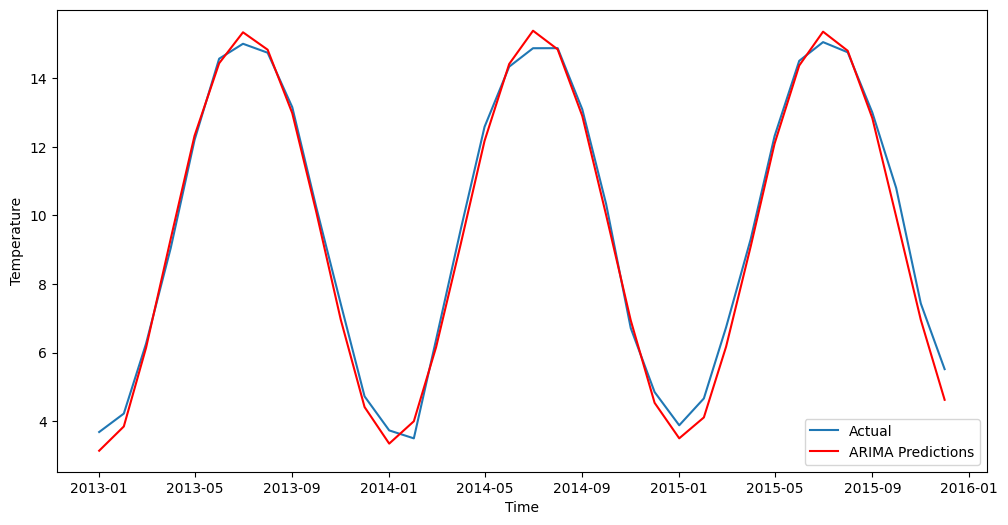

In [268]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual")
plt.plot(predictions, color="red", label="ARIMA Predictions")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [269]:
forecast_values= model.predict(start= '2016-01-01', end= '2018-12-01', dynamic= True)

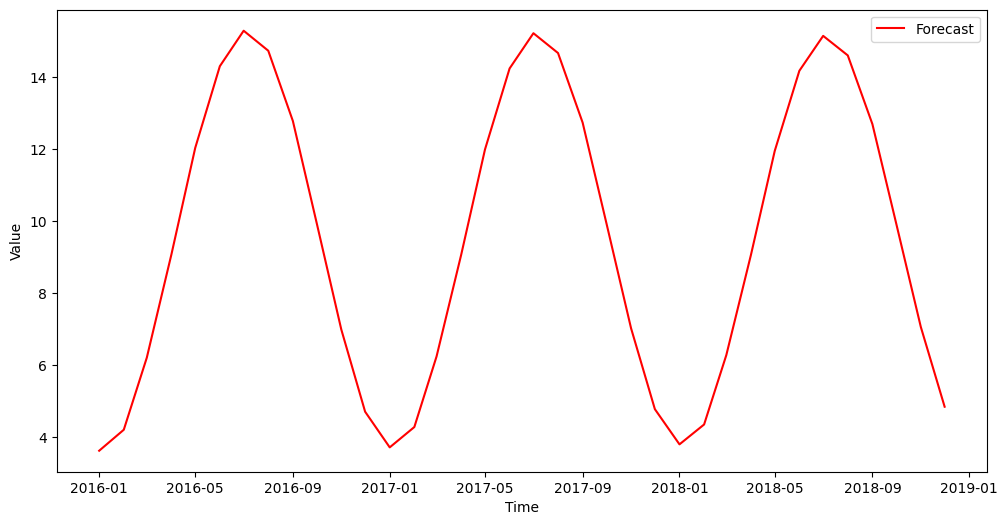

In [270]:
plt.figure(figsize=(12, 6))
plt.plot(forecast_values, color="red", label="Forecast")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

##SARIMA

In [289]:
sarima = SARIMAX(pd.concat([y_train, y_test]),
                order=(1,0,1),
                seasonal_order=(1,0,1,12), exog=pd.concat([X_train, X_test]))
result = sarima.fit()
predictions = result.predict(start='2013-01-01',end='2015-12-01',dynamic=True, exog=X_test)

In [290]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
rmse

0.8960922517735311

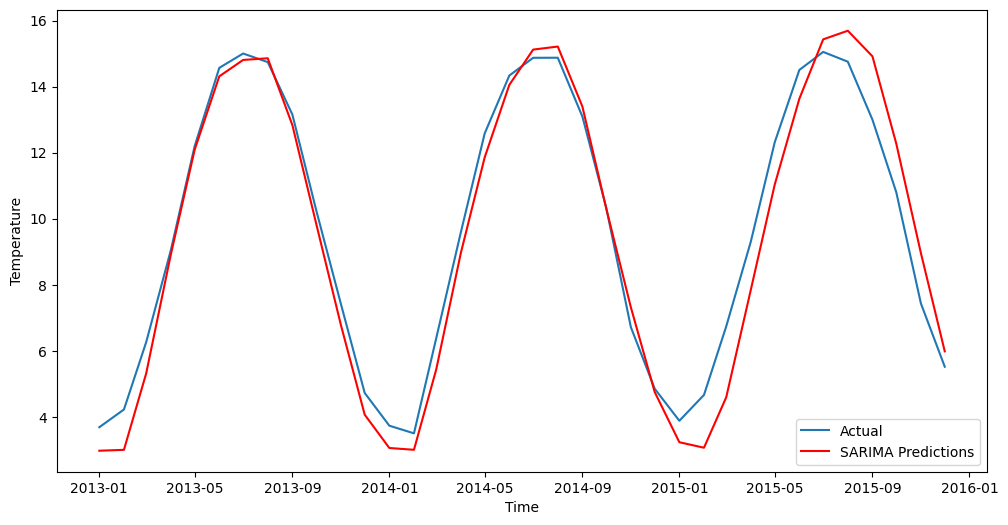

In [291]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual")
plt.plot(predictions, color="red", label="SARIMA Predictions")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [292]:
forecast_values= model.predict(start='2016-01-01', end= '2018-12-01', dynamic= True)

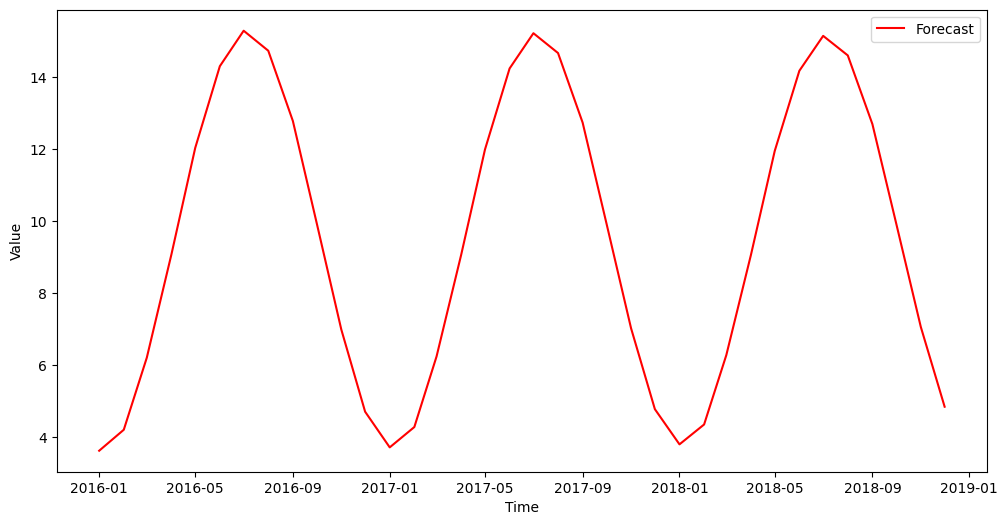

In [293]:
plt.figure(figsize=(12, 6))
plt.plot(forecast_values, color="red", label="Forecast")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

## Making a NAN value future dataset.

In [62]:
from pandas.tseries.offsets import DateOffset
pred_date=[clean_data.index[-1]+ DateOffset(months=x)for x in range(0,37)]

In [63]:
pred_date=pd.DataFrame(index=pred_date[1:],columns=clean_data.columns)
pred_date

,LandAvgTemp,month,year,season,LandAvgTemp_rolling6_shifting36,LandAvgTempUncert_rolling6_shifting36,LandMaxTemp_rolling6_shifting36,LandMaxTempUncert_rolling6_shifting36,LandMinTemp_rolling6_shifting36,LandMinTempUncert_rolling6_shifting36,...,LandMinTemp_rolling12_shifting48,LandMinTempUncert_rolling12_shifting48,Land_OceanAvgTemp_rolling12_shifting48,Land_OceanAvgTempUncert_rolling12_shifting48,month_shifting36,year_shifting36,seasen_shifting36,month_shifting48,year_shifting48,seasen_shifting48
2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
